# For the given ‘country’ dataset, perform the following tasks:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("Country.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Q1. Check for missing values, duplicate values and correlation And resolve them accordingly.

In [4]:
## checking for missing values
print(data.isna().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [5]:
## checking for duplicate values
data.duplicated().any()

False

<Axes: >

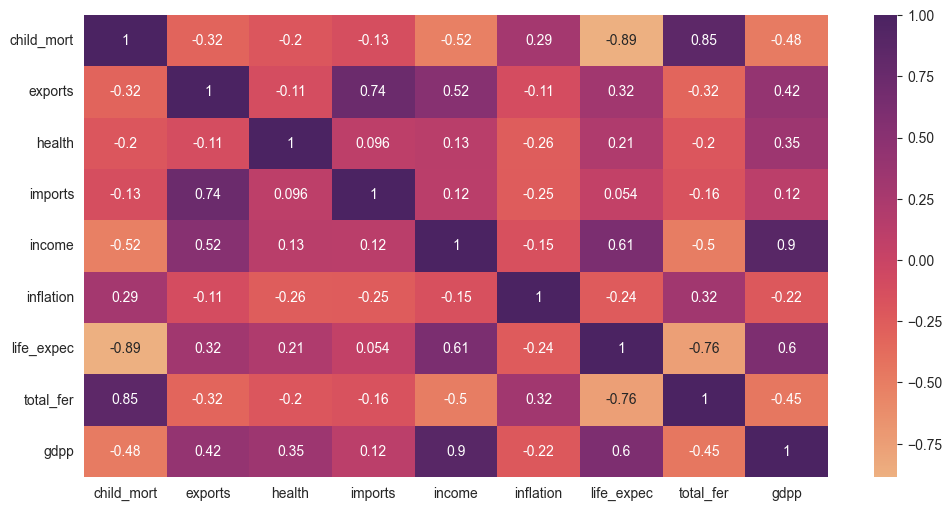

In [6]:
## determining correlation using heatmap
fig = plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,1:].corr(), cmap="flare", annot=True)

## Q2. Which countries should be provided with the aid? (Hint: Use Kmeans algorithm).

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.drop('country', axis=1))
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
data['Cluster'] = kmeans.labels_
data[data['Cluster'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


## Q3. Build a Kmeans model by selecting optimal number of clusters using elbow method.

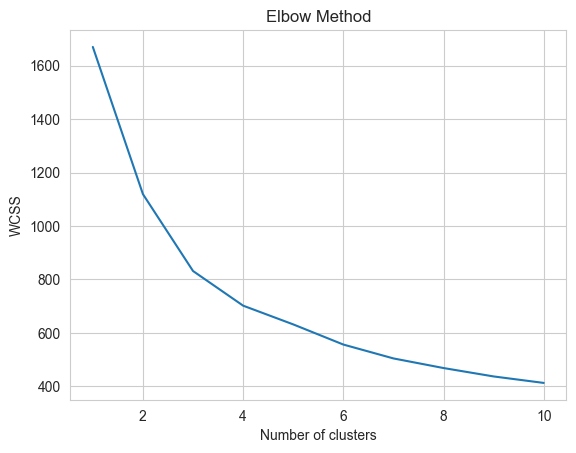

In [17]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Q4. Find optimal number of clusters using silhouette test.

In [23]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(scaled_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(scaled_df, label, metric='euclidean')
    print(f"For n_clusters={n_cluster}, the silhouette score is {sil_coeff}")

For n_clusters=2, the silhouette score is 0.33660681481165516
For n_clusters=3, the silhouette score is 0.336343918503763
For n_clusters=4, the silhouette score is 0.34761750397768193
For n_clusters=5, the silhouette score is 0.24936271194519918
For n_clusters=6, the silhouette score is 0.25713700188834365
For n_clusters=7, the silhouette score is 0.27288162722600606
For n_clusters=8, the silhouette score is 0.2309429473367851
For n_clusters=9, the silhouette score is 0.24060125996780093
For n_clusters=10, the silhouette score is 0.21485003369289105


## Hierarchical Clustering to find which countries need aid

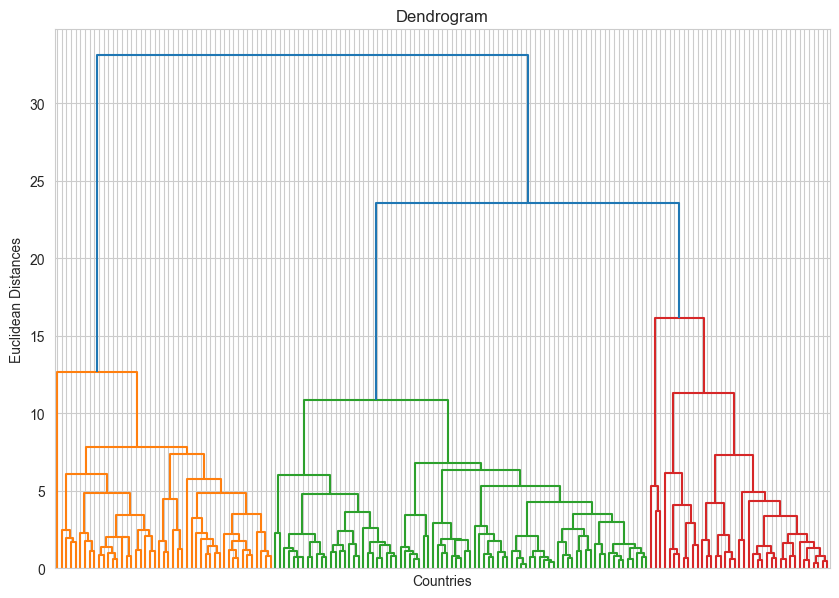

In [21]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
dendrogram = dendrogram(linkage(scaled_df, method='ward'))
plt.tick_params(labelbottom=False)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

In [22]:
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(scaled_df)
data['KMeans_Clusters'] = kmeans.labels_
data['Hierarchical_Clusters'] = agg_labels
countries_need_aid = data[data['Hierarchical_Clusters'] == 0]['country']
print("Countries that need aid based on Hierarchical Clustering:")
print(countries_need_aid)

Countries that need aid based on Hierarchical Clustering:
7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
89                    Libya
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
128            Saudi Arabia
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139               